# Лабораторная 7

## 1. Библиотека PyTorch

***PyTorch*** - это популярная библиотека глубокого обучения, которая позволяет создавать и обучать различные модели и архитектуры нейронных сетей. Кроме того, данная библиотека используется для обработки данных и оптимизации. 

In [2]:
# импортируем библиотеки
import numpy as np
import os

import torch
from torch import nn
from torch.nn import functional as F
from torch.utils.data import TensorDataset, DataLoader

from torchvision import transforms as tfs
from torchvision.datasets import MNIST

## 1.1 Тензоры в PyTorch

***Тензоры в PyTorch*** - это основные структуры данных, которые используются для представления данных и выполнения операций в библиотеке PyTorch. Тензоры очень похожи на многомерные массивы в NumPy. 


Можно выделить несколько особенностей тензоров в PyTorch:

1. ***Работа с данными***: Тензоры могут хранить числовые данные и многомерные массивы, такие как изображения, звуковые сигналы и текстовые данные. Они предоставляют удобный способ представления и обработки различных типов данных в машинном обучении.

2. ***Автоматическое дифференцирование***: в PyTorch присутствует автоматическое вычисление градиента функций. Это полезно при обучении нейронных сетей.

3. ***Гибкость***: Тензоры могут быть созданы, преобразованы и использованы для выполнения различных математических операций, таких как сложение, умножение, свертка и много других, что делает их удобным и эффективным инструментом для работы с данными и моделями обучения.

In [6]:
# Пример создания тензора из списка:
l = [1, 2, 3, 4, 5, 6, 7, 8, 9]
tensor = torch.tensor(l)
print(tensor)

tensor([1, 2, 3, 4, 5, 6, 7, 8, 9])


In [9]:
# Пример создания тензора из массива NumPy:
numpy_array = np.array([[1, 2, 3], [4, 5, 6]])
tensor = torch.tensor(numpy_array)
print(tensor)

tensor([[1, 2, 3],
        [4, 5, 6]], dtype=torch.int32)


In [10]:
# Пример создания нулевого тензора определенного размера:
zeros_tensor = torch.zeros(2, 3)
print(zeros_tensor)

tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [12]:
# Пример создания тензора с единицами:
ones_tensor = torch.ones(3, 3)
print(ones_tensor)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])


In [13]:
# Пример создания тензора со случайными значениями:
random_tensor = torch.rand(3, 3)
print(random_tensor)

tensor([[0.3566, 0.2035, 0.6769],
        [0.0909, 0.5201, 0.2090],
        [0.6921, 0.9719, 0.1673]])


In [14]:
# Пример создания float тензора:
torch_float = torch.FloatTensor(20)
print(torch_float)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])


In [15]:
# Создание тензора
x = torch.tensor([[1, 2, 3], [4, 5, 6]])
# Узнать размер тензора
print(x.size())  
# Узнать размер тензора
print(x.shape) 

torch.Size([2, 3])
torch.Size([2, 3])


## 1.2 Функции с тензорами в PyTorch

### Изменение формы

In [17]:
# Создание тензора
x = torch.tensor([[1, 2, 3], [4, 5, 6]])
# Изменение формы тензора
y = x.view(3, 2)
print(x)
print(y)

tensor([[1, 2, 3],
        [4, 5, 6]])
tensor([[1, 2],
        [3, 4],
        [5, 6]])


Обратите внимание, что ***.view*** оставляет старый тензор без изменений!

### Арифметические операции

In [18]:
# Создание тензоров
x = torch.tensor([[1, 2], [3, 4]])
y = torch.tensor([[1, 2], [3, 4]])

# Сложение тензоров
tensor_add = torch.add(x, y)
print("Сложение тензоров:")
print(tensor_add)

# Вычитание тензоров
tensor_sub = torch.sub(x, y)
print("Вычитание тензоров:")
print(tensor_sub)

# Умножение тензоров поэлементно
tensor_mul = torch.mul(x, y)
print("Поэлементное умножение тензоров:")
print(tensor_mul)

# Деление тензоров поэлементно
tensor_div = torch.div(x, y)
print("Поэлементное деление тензоров:")
print(tensor_div)

Сложение тензоров:
tensor([[2, 4],
        [6, 8]])
Вычитание тензоров:
tensor([[0, 0],
        [0, 0]])
Поэлементное умножение тензоров:
tensor([[ 1,  4],
        [ 9, 16]])
Поэлементное деление тензоров:
tensor([[1., 1.],
        [1., 1.]])


In [19]:
# Создание тензоров
x = torch.tensor([[1, 2], [3, 4]])
y = torch.tensor([[1, 2], [3, 4]])

# Сложение тензоров
tensor_add = x + y
print("Сложение тензоров:")
print(tensor_add)

# Вычитание тензоров
tensor_sub = x - y
print("Вычитание тензоров:")
print(tensor_sub)

# Умножение тензоров поэлементно
tensor_mul = x * y
print("Поэлементное умножение тензоров:")
print(tensor_mul)

# Деление тензоров поэлементно
tensor_div = x / y
print("Поэлементное деление тензоров:")
print(tensor_div)

Сложение тензоров:
tensor([[2, 4],
        [6, 8]])
Вычитание тензоров:
tensor([[0, 0],
        [0, 0]])
Поэлементное умножение тензоров:
tensor([[ 1,  4],
        [ 9, 16]])
Поэлементное деление тензоров:
tensor([[1., 1.],
        [1., 1.]])


### Операторы сравнения тензоров

In [20]:
# Создание тензоров
x = torch.tensor([[1, 2], [3, 4]])
y = torch.tensor([[1, 3], [3, 5]])

# Оператор сравнения (равенства)
print("Оператор сравнения (равенства):")
print(torch.eq(x, y))

# Оператор сравнения (больше или равно)
print("Оператор сравнения (больше или равно):")
print(torch.ge(x, y))

# Оператор сравнения (меньше или равно)
print("Оператор сравнения (меньше или равно):")
print(torch.le(x, y))

Оператор сравнения (равенства):
tensor([[ True, False],
        [ True, False]])
Оператор сравнения (больше или равно):
tensor([[ True, False],
        [ True, False]])
Оператор сравнения (меньше или равно):
tensor([[True, True],
        [True, True]])


In [21]:
# Создание тензоров
x = torch.tensor([[1, 2], [3, 4]])
y = torch.tensor([[1, 3], [3, 5]])

# Оператор сравнения (равенства)
print("Оператор сравнения (равенства):")
print(x == y)

# Оператор сравнения (больше или равно)
print("Оператор сравнения (больше или равно):")
print(x >= y)

# Оператор сравнения (меньше или равно)
print("Оператор сравнения (меньше или равно):")
print(x <= y)

Оператор сравнения (равенства):
tensor([[ True, False],
        [ True, False]])
Оператор сравнения (больше или равно):
tensor([[ True, False],
        [ True, False]])
Оператор сравнения (меньше или равно):
tensor([[True, True],
        [True, True]])


### Применение математических функций

In [22]:
x = torch.tensor([0, 1, 2, 3, 4])

# Применение универсальной функции к тензору
y = torch.sin(x)  # Применение синуса к каждому элементу тензора
print(y)

# Еще примеры универсальных функций
z = torch.exp(x)  # Применение экспоненты к каждому элементу тензора
print(z)

w = torch.log(x)  # Применение натурального логарифма к каждому элементу тензора
print(w)

tensor([ 0.0000,  0.8415,  0.9093,  0.1411, -0.7568])
tensor([ 1.0000,  2.7183,  7.3891, 20.0855, 54.5981])
tensor([  -inf, 0.0000, 0.6931, 1.0986, 1.3863])


### Агрегация 

In [24]:
# Создание тензора
x = torch.tensor([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0], [7.0, 8.0, 9.0]])

# Нахождение максимального значения в тензоре
max_value = torch.max(x)
print("Максимальное значение в тензоре:", max_value)

# Нахождение минимального значения в тензоре
min_value = torch.min(x)
print("Минимальное значение в тензоре:", min_value)

# Вычисление среднего значения тензора
mean_value = torch.mean(x)
print("Среднее значение тензора:", mean_value)

# Вычисление суммы значений тензора
sum_value = torch.sum(x)
print("Сумма значений тензора:", sum_value)

Максимальное значение в тензоре: tensor(9.)
Минимальное значение в тензоре: tensor(1.)
Среднее значение тензора: tensor(5.)
Сумма значений тензора: tensor(45.)


### Матричные операции

In [27]:
A = torch.tensor([[1, 2], [3, 4]])
B = torch.tensor([[5, 6], [7, 8]])

# Сложение матриц
C = A + B
print("Сложение матриц:")
print(C)

# Умножение матриц
C = torch.matmul(A, B)
print("Результат умножения матриц:")
print(C)

print("Результат умножения матриц:")
print(A @ B)

# Транспонирование матрицы
D = torch.transpose(A, 0, 1)
print("Транспонированная матрица:")
print(D)

Сложение матриц:
tensor([[ 6,  8],
        [10, 12]])
Результат умножения матриц:
tensor([[19, 22],
        [43, 50]])
Результат умножения матриц:
tensor([[19, 22],
        [43, 50]])
Транспонированная матрица:
tensor([[1, 3],
        [2, 4]])


## 1.3 Работа с осями в PyTorch

In [29]:
# Создание тензора
x = torch.tensor([[1, 2, 3], [4, 5, 6]])

# Вычисление суммы значений по определенной оси
# По умолчанию ось равна -1 (последняя ось)
sum_along_axis_0 = torch.sum(x, dim=0)
print("Сумма значений по оси 0:", sum_along_axis_0)

sum_along_axis_0 = torch.sum(x, dim=1)
print("Сумма значений по оси 1:", sum_along_axis_0)

Сумма значений по оси 0: tensor([5, 7, 9])
Сумма значений по оси 1: tensor([ 6, 15])


In [32]:
# Вычисление максимальных значений по определенной оси
max_along_axis_1 = torch.max(x, dim=0)
print("Максимальные значения по оси 0:", max_along_axis_1.values)
print("Индексы максимальных значений по оси 0:", max_along_axis_1.indices)

max_along_axis_1 = torch.max(x, dim=1)
print("Максимальные значения по оси 1:", max_along_axis_1.values)
print("Индексы максимальных значений по оси 1:", max_along_axis_1.indices)

Максимальные значения по оси 0: tensor([4, 5, 6])
Индексы максимальных значений по оси 0: tensor([1, 1, 1])
Максимальные значения по оси 1: tensor([3, 6])
Индексы максимальных значений по оси 1: tensor([2, 2])


### Задача 1(3 балла)

1. Создайте два тензор размера 4 на 2 и 2 на 4 из целых чисел.

In [4]:
A = torch.rand(2, 4)
B = torch.rand(4, 2)
A, B

(tensor([[0.9678, 0.7247, 0.9471, 0.3850],
         [0.4302, 0.4666, 0.4699, 0.9951]]),
 tensor([[0.0244, 0.0569],
         [0.2447, 0.9280],
         [0.1886, 0.0543],
         [0.7226, 0.1919]]))

2. Умножьте два тензора поэлементно и матрично. 

In [11]:
A = torch.rand(3, 3)
B = torch.rand(3, 3)
C1 = torch.mul(A, B)
print(C1)
C2 = torch.matmul(A, B)
print(C2)

tensor([[0.0355, 0.0026, 0.1796],
        [0.7146, 0.0363, 0.0719],
        [0.2289, 0.0038, 0.0663]])
tensor([[0.5874, 0.0364, 0.2410],
        [1.5787, 0.0619, 0.6701],
        [0.4386, 0.0162, 0.1913]])


3. Вычислить сумму значений тензоров, полученных в пункте 2.  

In [12]:
print(C1 + C2)

tensor([[0.6229, 0.0390, 0.4206],
        [2.2933, 0.0982, 0.7419],
        [0.6675, 0.0200, 0.2576]])


4. Создайте тензор размера 15 на 13 из случайных чисел. Транспонируйте данный тензор. 

In [180]:
A = torch.rand(15, 13)
B = torch.transpose(A, 0, 1)
B

tensor([[0.4062, 0.3857, 0.4386, 0.1929, 0.6519, 0.0730, 0.5865, 0.7728, 0.8300,
         0.4488, 0.2988, 0.9109, 0.3992, 0.7866, 0.6818],
        [0.3050, 0.3480, 0.8141, 0.4861, 0.1921, 0.7405, 0.8493, 0.3163, 0.8384,
         0.8607, 0.5194, 0.2562, 0.8832, 0.4897, 0.8831],
        [0.1934, 0.4280, 0.7540, 0.9993, 0.8065, 0.7331, 0.9722, 0.3375, 0.7756,
         0.9689, 0.1339, 0.1523, 0.2908, 0.9257, 0.6401],
        [0.3454, 0.3796, 0.4116, 0.4170, 0.5459, 0.1631, 0.0119, 0.3319, 0.2885,
         0.9573, 0.1380, 0.3612, 0.6917, 0.4970, 0.0894],
        [0.5605, 0.5937, 0.1034, 0.2801, 0.1341, 0.6313, 0.8608, 0.5152, 0.8944,
         0.3124, 0.8489, 0.0687, 0.7333, 0.0743, 0.6301],
        [0.9402, 0.3816, 0.6480, 0.2529, 0.8707, 0.3430, 0.7305, 0.1540, 0.6486,
         0.2037, 0.8755, 0.7399, 0.5864, 0.9971, 0.9812],
        [0.9120, 0.8595, 0.7299, 0.3505, 0.4914, 0.9985, 0.1297, 0.7053, 0.5058,
         0.8890, 0.7380, 0.4704, 0.4433, 0.4794, 0.2542],
        [0.6028, 0.6516, 0.

5. Найти максимальное значение в тензоре, найдите максимальное значение в каждом столбце и строке. 

In [18]:
A = torch.rand(3, 3)
print(A)
print(torch.max(A))
print(torch.max(A, dim = 0).values)
print(torch.max(A, dim = 1).values)

tensor([[0.9249, 0.7995, 0.7613],
        [0.2895, 0.8994, 0.8063],
        [0.2807, 0.4470, 0.4888]])
tensor(0.9249)
tensor([0.9249, 0.8994, 0.8063])
tensor([0.9249, 0.8994, 0.4888])


6. Умножить матрицу, созданную в пункте 4 на скаляр.

In [19]:
print(A * 5)

tensor([[4.6247, 3.9973, 3.8066],
        [1.4474, 4.4971, 4.0314],
        [1.4037, 2.2351, 2.4438]])


7. Создайте тензор размера 15 на 1 из случайных чисел.  Изменить форму тензора (преобразовать одномерный тензор в двумерный и наоборот).

In [22]:
A = torch.rand(1, 16)
B = A.view(2, 8)
B

tensor([[0.3959, 0.2882, 0.9247, 0.7779, 0.5725, 0.0926, 0.1742, 0.8969],
        [0.1329, 0.3269, 0.4946, 0.5333, 0.5169, 0.1558, 0.3311, 0.2744]])

8. Найти сумму значений по определенной оси тензора пункта 6.

In [26]:
A = torch.rand(3, 3)
print(A)
print(torch.sum(A))
print(torch.max(A[0]))

tensor([[0.8180, 0.8153, 0.8099],
        [0.8299, 0.4890, 0.3270],
        [0.9089, 0.5276, 0.2110]])
tensor(5.7366)
tensor(0.8180)


9. Создайте тензор размера 100 на 20 из случайных чисел. Найдите среднее от максимального значения по каждому столбцу. 

In [45]:
A = torch.rand(100, 20)
B = torch.transpose(A, 0, 1)
maxs = []
for i in range (20):
    a = torch.max(B[i])
    maxs.append(a.item())

print(np.mean(maxs))

0.9909552156925201


## 2 Полносвязная нейронная сеть

## 2.1 Модель нейрона

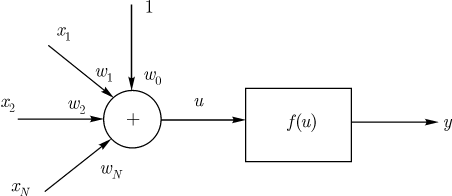

***Модель нейрона*** - это математическая модель. Она обычно состоит из следующих элементов:

1. **Входные данные (Input):** На вход модели нейрона поступают признаки или значения, которые необходимо обработать. На картинке выше - это $x_1, x_2, ... x_N$.

2. **Веса (Weights):** Каждый входной признак соотносится с определенным весом, который отражает его важность для вычислений. В процессе обучения модель обучается и веса меняются таким образом, чтобы уменьшить функцию потерь. На картинке выше - это $w_0, w_1, w_2, ... w_N$.

3. **Сумматор (Aggregator):** В сумматоре происходит вычисление скалярного произведения $u = <x,w> = w_0 \cdot 1 + w_1 \cdot x_1 + ... w_N \cdot x_N$. 

4. **Функция активации (Activation Function):** Результат сумматора $u$ проходит через функцию активации $f(u)$, которая добавляет нелинейность в модель. 

5. **Выход (Output):** На основе результата функции активации нейрон генерирует свое значение - $y$, которое затем может передаваться другим нейронам. 

Данная математическая модель имеет некоторую связь с биологической моделью:
    
1. В биологических терминах $x_1, x_2 ... x_N$ можно рассматривать как входные сигналы, поступающие к дендритам нейрона.

2. В биологических терминах функция активации $f(u)$ может отвечать за возбуждение или подавление сигналов, пришедших к нейрону. 
 

## 2.2 Функции активации 

Давайте теперь перечислим самые популярные функции активации:

1. **Сигмоида (Sigmoid):** Функция сигмоиды преобразует входное значение в диапазоне от 0 до 1.
$$ \sigma(x) = \frac{1}{1 + e^{-x}} $$
Данная функция потерь может иметь проблему, связанную с затуханием градиента, но об этом мы поговорим позже. 

2. **Гиперболический тангенс (Tanh):** Эта функция активации преобразует входное значение в диапазоне от -1 до 1. Ее формула:
$$ \tanh(x) = \frac{e^{x} - e^{-x}}{e^{x} + e^{-x}}$$
Данная функция потерь может иметь проблему, связанную с затуханием градиента, но об этом мы поговорим позже. 

3. **ReLu (Rectified Linear Unit):** Это одна из самых популярных функций активации. Он заменяет отрицательные значения на 0, а положительные значения оставляет без изменений:
$$ f(x) = \max(0, x) $$

4. **Leaky ReLU:** Эта функция аналогична ReLU, но в случае отрицательных значений она допускает небольшие отрицательные значения:
$$ f(x) = \max(ax, x) $$
где a - небольшая константа.

5. **Softmax:** Эта функция активации применяется обычно в последнем слое нейронной сети для задач классификации. Она преобразует вектор значений на входе в вероятностное распределение, сумма которых равна 1. Он обычно используется для многоклассовой классификации.

6. **ELU (Exponential Linear Unit):** Это функция активации, которая является вариантом ReLU с небольшим отрицательным смещением. Его формула:
$$ f(x) = \begin{cases} x & \text{если } x > 0, \\ a(e^x - 1) & \text{если } x \leq 0, \end{cases} $$
где a - небольшая положительная константа.

### Задача 2 (1 балл)

Реализуйте модель нейрона. 

Реализуйте функцию, принимающую на вход N признаков $x_1, ... x_N$, а также N + 1 весов $w_0, ... w_N$, и вычисляющая $f(u)$. В качестве функции активации возьмите сигмойду. 

Продемонстрируйте работу функции. 

In [61]:
def neuron(x, weights):
    A = x
    B = weights[1::]
    u = weights[0].item() + torch.matmul(A, B)
    return 1 / (1 + np.exp(-u))


In [62]:
N = 3
x = torch.rand(1, N)
weights = torch.rand(N + 1, 1)
print(x, weights)
neuron(x, weights)

tensor([[0.7095, 0.0675, 0.4812]]) tensor([[0.3486],
        [0.1125],
        [0.6137],
        [0.9764]])


tensor([[0.7190]])

## 2.3 Полносвязная нейронная сеть

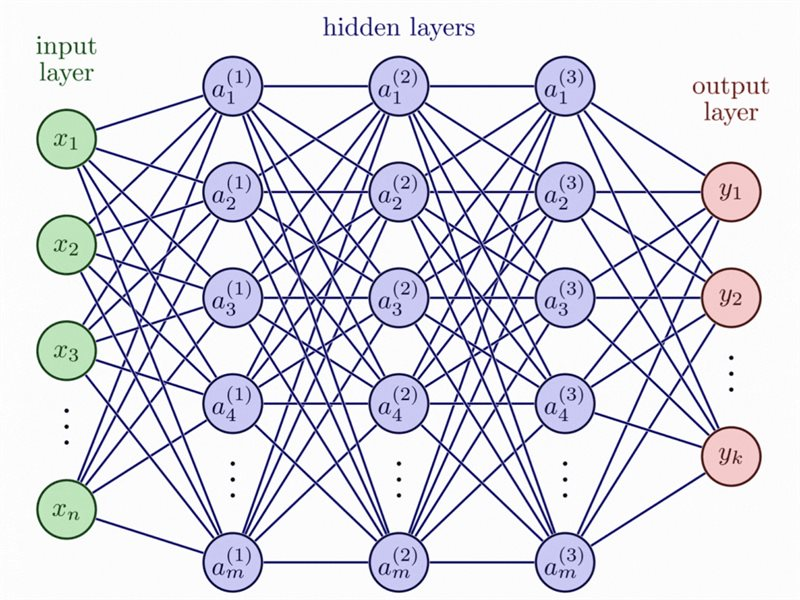

Элементы полносвязной нейронной сети включают в себя несколько основных компонентов:

1. ***Входной слой***: Этот слой принимает входные данные, например, значения признаков объекта. Количество нейронов в этом слое соответствует числу признаков объекта. На картинке это $x_1 ... x_n$.

2. ***Скрытые слои***: Полносвязная нейронная сеть может содержать один или более скрытых слоев, где каждый нейрон в слое связан со всеми нейронами предыдущего и последующего слоев. Скрытые слои выполняют сложные нелинейные преобразования входных данных.

3. ***Выходной слой***: Этот слой представляет собой окончательные выходы нейронной сети, которые могут быть связаны с конкретными классами (в случае классификации) или представлять числовые значения (в случае регрессии).

4. ***Веса и смещения***: Каждая связь между нейронами имеет свой вес, который определяет степень важности связи.

5. ***Функции активации***: Для внесения нелинейности в сеть используются функции активации.

Обучение нейронной сети осуществляется с помощью метода ***backpropagation***. Предположим, у нас есть простая нейронная сеть с одним скрытым слоем. Мы хотим обучить эту сеть для решения задачи регрессии, поэтому функцией потерь будет среднеквадратичная ошибка (MSE).

1. **Прямой проход (forward pass)**:
Пусть у нас есть входной вектор данных $\mathbf{x}$, веса скрытого слоя $\mathbf{W}$, смещения скрытого слоя $\mathbf{b}$, активационная функция скрытого слоя $\sigma$, веса выходного слоя $ \mathbf{V}$ и смещение выходного слоя $c$.
Выход скрытого слоя вычисляется как $\mathbf{h} = \sigma(\mathbf{Wx} + \mathbf{b})$, 
Затем происходит вычисление выхода сети $ y = \mathbf{Vh} + c $.

2. **Функция потерь**:
Для задачи регрессии мы используем среднеквадратичную ошибку: $L(y, y_{true}) = \frac{1}{2} (y - y_{true})^2$.

3. **Обратный проход (backward pass)**:
Вернемся к выражению для выхода:
$y = \mathbf{V\sigma(\mathbf{Wx} + \mathbf{b})} + c$.
Для обновления весов сети в направлении уменьшения ошибки нам нужно вычислить градиенты функции потерь по параметрам сети, то есть по весам $\mathbf{W}$, $\mathbf{b}$, $\mathbf{V}$ и $ c $.

4. **Обновление весов**:
Получив градиенты, мы используем их в алгоритме градиентного спуска (или других методах оптимизации) для обновления весов сети.

На данный момент может возникнуть вопрос, а как мы всё-таки считаем градиенты и обновляем веса. Этот вопрос мы рассмотрим позже ***в следующей лабораторной работе***. Пока же достаточно понимать, что во время обучения происходит ***обновление весов с целью уменьшения функции потерь***. 

Теперь же давайте построим нейронную сеть и обучим её для классификации датасета MNIST. 

### Подготовка датасета

В PyTorch класс ***Compose*** из модуля torchvision.transforms представляет собой способ объединения нескольких преобразований данных (трансформаций) в одно целое.

***tfs.ToTensor()*** преобразует данные в тензоры. 

***tfs.Normalize()*** нормализует данные. 

In [128]:
data_tfs = tfs.Compose([
    tfs.ToTensor(),
    tfs.Normalize((0.5), (0.5))
])
root = './'
train_dataset = MNIST(root, train=True,  transform=data_tfs, download=True)
val_dataset  = MNIST(root, train=False, transform=data_tfs, download=True)

In [129]:
print(type(train_dataset[0]))
print(type(train_dataset[0][0]))
print(type(train_dataset[0][1]))

<class 'tuple'>
<class 'torch.Tensor'>
<class 'int'>


Таким образом теперь 'train_dataset' - это объект содержащий tuple. Каждый tuple содержит в себе ***тензор - картинку*** и саму ***цифру***, которой соответствует данная картинка. 

In [130]:
### тензор - картинка
train_dataset[0][0].shape

torch.Size([1, 28, 28])

In [131]:
### сама цифра - класс
train_dataset[0][1]

5

***DataLoader*** это инструмент в библиотеке PyTorch, который упрощает процесс подготовки данных для обучения нейронных сетей. Он позволяет эффективно загружать и обрабатывать данные в параллельных процессах во время обучения модели. DataLoader автоматически разделяет данные на батчи, выполняет преобразования и перемешивание данных.

***Эпоха и batch*** в данном случае имеют тоже значение, что и в ***стохастическом градиентном спуске***. 

In [132]:
train_dataloader =  DataLoader(train_dataset, batch_size=128)
valid_dataloader =  DataLoader(val_dataset, batch_size=128)

В данном случае batch_size = 128, т.е мы делаем обновление весов на выборке из 128 элементов. 

### Архитектура сети

Теперь давайте же зададим архитектуру нашей сети:

In [97]:
activation = nn.ReLU()
model = nn.Sequential(
    # nn.Flatten преобразует входные данные, двумерный тензор, 
    #в одномерный тензор путем "сплющивания" всех осей на входном тензоре, кроме первой.
    nn.Flatten(),
    # линейный слой со 784 признаками на входе и 256 на выходе
    nn.Linear(28 * 28, 256),
    # функция активации ReLU
    activation,
    # линейный слой со 256 признаками на входе и 128 на выходе
    nn.Linear(256, 128),
    # функция активации ReLU
    activation,
    # линейный слой со 128 признаками на входе и 64 на выходе
    nn.Linear(128, 64),
    # функция активации ReLU
    activation,
    # линейный слой со 64 признаками на входе и 10 на выходе
    nn.Linear(64, 10)
)

***nn.CrossEntropyLoss()*** - это функция потерь (loss function) в библиотеке PyTorch, которая часто используется для задач классификации.

***torch.optim.Adam*** - очень популярный и эффективный оптимизатор. Как правило работает лучше, чем стохастический градиентный спуск: ***torch.optim.SGD***

In [110]:
# функция потерь
criterion = nn.CrossEntropyLoss()
# оптимизатор - то что обновляет веса модели(model.parameters)
optimizer = torch.optim.Adam(model.parameters())
# словарь для удобства вывода результатов
loaders = {"train": train_dataloader, "valid": valid_dataloader}

In [111]:
device = "cuda" if torch.cuda.is_available() else "cpu"

### Обучение

Метод ***model.train()*** используется в библиотеке PyTorch для установки модели в режим обучения. При вызове этого метода модель переходит в режим обучения, что означает, что PyTorch будет отслеживать градиенты всех параметров модели для обновления их в процессе обучения с помощью метода обратного распространения ошибки (backpropagation).

Метод ***model.eval()*** используется в библиотеке PyTorch для установки модели в режим оценки (evaluation mode) или режима инференса (inference mode). При вызове этого метода модель переходит из режима обучения в режим оценки.

В режиме оценки модель не отслеживает градиенты и не обновляет параметры в процессе обучения. Это позволяет ускорить вычисления и сэкономить ресурсы, поскольку нет необходимости хранить и вычислять градиенты во время оценки или предсказания.

In [101]:
# число эпох
max_epochs = 3
# словарь для хранения точности на обучающей и на тестовой выборке(valid)
accuracy = {"train": [], "valid": []}
# итерируемся по датасету столько раз, сколько число эпох
for epoch in range(max_epochs):
    # k принимает два значения - train и valid
    for k, dataloader in loaders.items():
        epoch_correct = 0
        epoch_all = 0
        # выбираем batch из выборки, по нему и будем делать оптимизациооный шаг
        for x_batch, y_batch in dataloader:
            if k == "train":
                # переходим в "режим обучения"
                model.train()
                # обнуляем градиенты модели
                optimizer.zero_grad()
                # выходные значения модели
                outp = model(x_batch)
                # считаем функцию потерь
                loss = criterion(outp, y_batch)
                # считаем градиенты
                loss.backward()
                # делаем шаг градиентного спуска
                optimizer.step()
            else:
                # переходим в "режим тестирования"
                model.eval()
                # отключение вычисления и хранения градиентов
                with torch.no_grad():
                    outp = model(x_batch)
            # вычисляем точность 
            preds = outp.argmax(-1)
            correct = (preds == y_batch).sum()
            all = y_batch.shape[0]
            epoch_correct += correct.item()
            epoch_all += all
        # выводим точность 
        if k == "train":
            print(f"Epoch: {epoch+1}")
        print(f"Loader: {k}. Accuracy: {epoch_correct/epoch_all}")
        accuracy[k].append(epoch_correct/epoch_all)

Epoch: 1
Loader: train. Accuracy: 0.9007166666666667
Loader: valid. Accuracy: 0.9207
Epoch: 2
Loader: train. Accuracy: 0.9414166666666667
Loader: valid. Accuracy: 0.9439
Epoch: 3
Loader: train. Accuracy: 0.9576333333333333
Loader: valid. Accuracy: 0.959


У вас может возникнуть несколько вопросов, которые мы рассмотрим в следующей лабораторной работе:
1. Как работает ***backpropagation*** с математической точки зрения?
2. Как выглядит функция потерь с математической точки зрения?
3. Есть ли какие - нибудь методы регуляризации нейронных сетей?

### Задача 3(2 балла)

Попробуйте использовать разные функции активации: ***сигмоиду, tanh, и ELU*** для классификации датасета MNIST. Постройте график зависимости точности на valid выборке от числа эпох(до 10) для каждой функции активации. Какая даёт лучший результат? 

In [109]:
activation = nn.Sigmoid()
model = nn.Sequential(
    # nn.Flatten преобразует входные данные, двумерный тензор, 
    #в одномерный тензор путем "сплющивания" всех осей на входном тензоре, кроме первой.
    nn.Flatten(),
    # линейный слой со 784 признаками на входе и 256 на выходе
    nn.Linear(28 * 28, 256),
    # функция активации ReLU
    activation,
    # линейный слой со 256 признаками на входе и 128 на выходе
    nn.Linear(256, 128),
    # функция активации ReLU
    activation,
    # линейный слой со 128 признаками на входе и 64 на выходе
    nn.Linear(128, 64),
    # функция активации ReLU
    activation,
    # линейный слой со 64 признаками на входе и 10 на выходе
    nn.Linear(64, 10)
)

In [112]:
# число эпох
max_epochs = 3
# словарь для хранения точности на обучающей и на тестовой выборке(valid)
accuracy = {"train": [], "valid": []}
# итерируемся по датасету столько раз, сколько число эпох
for epoch in range(max_epochs):
    # k принимает два значения - train и valid
    for k, dataloader in loaders.items():
        epoch_correct = 0
        epoch_all = 0
        # выбираем batch из выборки, по нему и будем делать оптимизациооный шаг
        for x_batch, y_batch in dataloader:
            if k == "train":
                # переходим в "режим обучения"
                model.train()
                # обнуляем градиенты модели
                optimizer.zero_grad()
                # выходные значения модели
                outp = model(x_batch)
                # считаем функцию потерь
                loss = criterion(outp, y_batch)
                # считаем градиенты
                loss.backward()
                # делаем шаг градиентного спуска
                optimizer.step()
            else:
                # переходим в "режим тестирования"
                model.eval()
                # отключение вычисления и хранения градиентов
                with torch.no_grad():
                    outp = model(x_batch)
            # вычисляем точность 
            preds = outp.argmax(-1)
            correct = (preds == y_batch).sum()
            all = y_batch.shape[0]
            epoch_correct += correct.item()
            epoch_all += all
        # выводим точность 
        if k == "train":
            print(f"Epoch: {epoch+1}")
        print(f"Loader: {k}. Accuracy: {epoch_correct/epoch_all}")
        accuracy[k].append(epoch_correct/epoch_all)

Epoch: 1
Loader: train. Accuracy: 0.7339
Loader: valid. Accuracy: 0.909
Epoch: 2
Loader: train. Accuracy: 0.92425
Loader: valid. Accuracy: 0.9437
Epoch: 3
Loader: train. Accuracy: 0.9475833333333333
Loader: valid. Accuracy: 0.9545


{'train': [0.7339, 0.92425, 0.9475833333333333], 'valid': [0.909, 0.9437, 0.9545]}


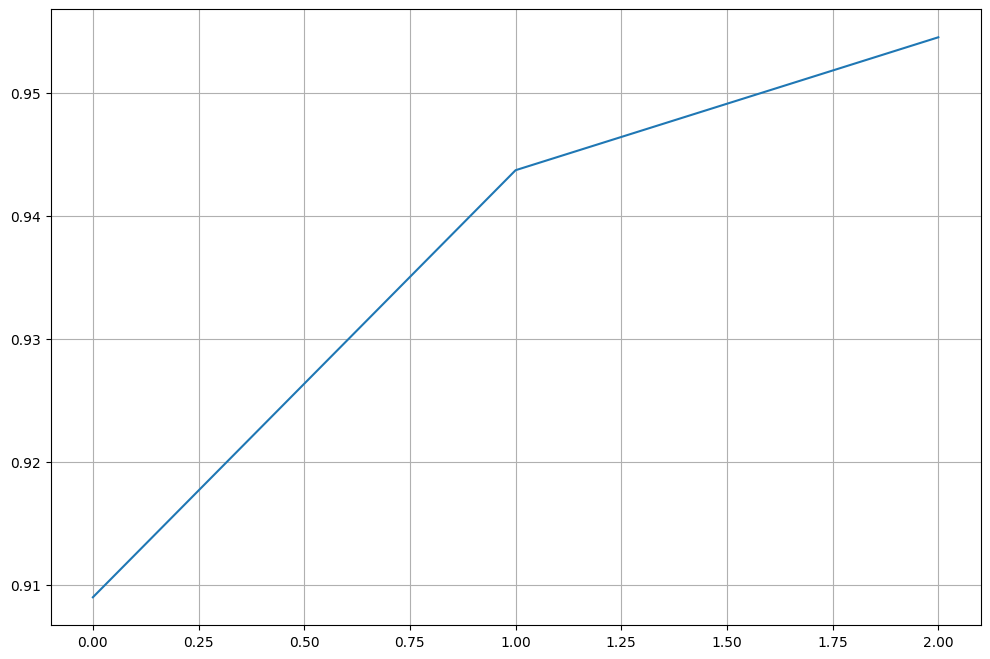

In [113]:
import matplotlib.pyplot as plt
print(accuracy)
fig, ax = plt.subplots(figsize = (12, 8))
plt.grid()
plt.plot(accuracy['valid'])
plt.show()

In [133]:
data_tfs = tfs.Compose([
    tfs.ToTensor(),
    tfs.Normalize((0.5), (0.5))
])
root = './'
train_dataset = MNIST(root, train=True,  transform=data_tfs, download=True)
val_dataset  = MNIST(root, train=False, transform=data_tfs, download=True)

train_dataloader =  DataLoader(train_dataset, batch_size=128)
valid_dataloader =  DataLoader(val_dataset, batch_size=128)

activation = nn.Tanh()
model = nn.Sequential(
    # nn.Flatten преобразует входные данные, двумерный тензор, 
    #в одномерный тензор путем "сплющивания" всех осей на входном тензоре, кроме первой.
    nn.Flatten(),
    # линейный слой со 784 признаками на входе и 256 на выходе
    nn.Linear(28 * 28, 256),
    # функция активации ReLU
    activation,
    # линейный слой со 256 признаками на входе и 128 на выходе
    nn.Linear(256, 128),
    # функция активации ReLU
    activation,
    # линейный слой со 128 признаками на входе и 64 на выходе
    nn.Linear(128, 64),
    # функция активации ReLU
    activation,
    # линейный слой со 64 признаками на входе и 10 на выходе
    nn.Linear(64, 10)
)

# функция потерь
criterion = nn.CrossEntropyLoss()
# оптимизатор - то что обновляет веса модели(model.parameters)
optimizer = torch.optim.Adam(model.parameters())
# словарь для удобства вывода результатов
loaders = {"train": train_dataloader, "valid": valid_dataloader}

device = "cuda" if torch.cuda.is_available() else "cpu"

In [134]:
# число эпох
max_epochs = 3
# словарь для хранения точности на обучающей и на тестовой выборке(valid)
accuracy = {"train": [], "valid": []}
# итерируемся по датасету столько раз, сколько число эпох
for epoch in range(max_epochs):
    # k принимает два значения - train и valid
    for k, dataloader in loaders.items():
        epoch_correct = 0
        epoch_all = 0
        # выбираем batch из выборки, по нему и будем делать оптимизациооный шаг
        for x_batch, y_batch in dataloader:
            if k == "train":
                # переходим в "режим обучения"
                model.train()
                # обнуляем градиенты модели
                optimizer.zero_grad()
                # выходные значения модели
                outp = model(x_batch)
                # считаем функцию потерь
                loss = criterion(outp, y_batch)
                # считаем градиенты
                loss.backward()
                # делаем шаг градиентного спуска
                optimizer.step()
            else:
                # переходим в "режим тестирования"
                model.eval()
                # отключение вычисления и хранения градиентов
                with torch.no_grad():
                    outp = model(x_batch)
            # вычисляем точность 
            preds = outp.argmax(-1)
            correct = (preds == y_batch).sum()
            all = y_batch.shape[0]
            epoch_correct += correct.item()
            epoch_all += all
        # выводим точность 
        if k == "train":
            print(f"Epoch: {epoch+1}")
        print(f"Loader: {k}. Accuracy: {epoch_correct/epoch_all}")
        accuracy[k].append(epoch_correct/epoch_all)

Epoch: 1
Loader: train. Accuracy: 0.8842
Loader: valid. Accuracy: 0.9423
Epoch: 2
Loader: train. Accuracy: 0.9464333333333333
Loader: valid. Accuracy: 0.9594
Epoch: 3
Loader: train. Accuracy: 0.9610666666666666
Loader: valid. Accuracy: 0.9572


{'train': [0.8842, 0.9464333333333333, 0.9610666666666666], 'valid': [0.9423, 0.9594, 0.9572]}


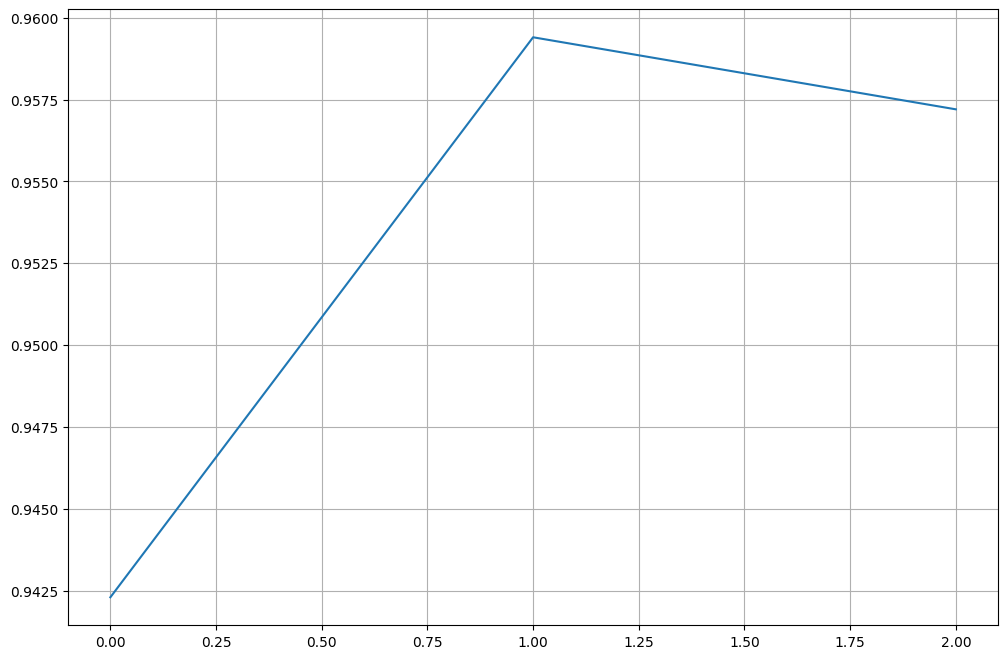

In [135]:
import matplotlib.pyplot as plt
print(accuracy)
fig, ax = plt.subplots(figsize = (12, 8))
plt.grid()
plt.plot(accuracy['valid'])
plt.show()

In [137]:
data_tfs = tfs.Compose([
    tfs.ToTensor(),
    tfs.Normalize((0.5), (0.5))
])
root = './'
train_dataset = MNIST(root, train=True,  transform=data_tfs, download=True)
val_dataset  = MNIST(root, train=False, transform=data_tfs, download=True)

train_dataloader =  DataLoader(train_dataset, batch_size=128)
valid_dataloader =  DataLoader(val_dataset, batch_size=128)

activation = nn.ELU()
model = nn.Sequential(
    # nn.Flatten преобразует входные данные, двумерный тензор, 
    #в одномерный тензор путем "сплющивания" всех осей на входном тензоре, кроме первой.
    nn.Flatten(),
    # линейный слой со 784 признаками на входе и 256 на выходе
    nn.Linear(28 * 28, 256),
    # функция активации ReLU
    activation,
    # линейный слой со 256 признаками на входе и 128 на выходе
    nn.Linear(256, 128),
    # функция активации ReLU
    activation,
    # линейный слой со 128 признаками на входе и 64 на выходе
    nn.Linear(128, 64),
    # функция активации ReLU
    activation,
    # линейный слой со 64 признаками на входе и 10 на выходе
    nn.Linear(64, 10)
)

# функция потерь
criterion = nn.CrossEntropyLoss()
# оптимизатор - то что обновляет веса модели(model.parameters)
optimizer = torch.optim.Adam(model.parameters())
# словарь для удобства вывода результатов
loaders = {"train": train_dataloader, "valid": valid_dataloader}

device = "cuda" if torch.cuda.is_available() else "cpu"

In [138]:
# число эпох
max_epochs = 3
# словарь для хранения точности на обучающей и на тестовой выборке(valid)
accuracy = {"train": [], "valid": []}
# итерируемся по датасету столько раз, сколько число эпох
for epoch in range(max_epochs):
    # k принимает два значения - train и valid
    for k, dataloader in loaders.items():
        epoch_correct = 0
        epoch_all = 0
        # выбираем batch из выборки, по нему и будем делать оптимизациооный шаг
        for x_batch, y_batch in dataloader:
            if k == "train":
                # переходим в "режим обучения"
                model.train()
                # обнуляем градиенты модели
                optimizer.zero_grad()
                # выходные значения модели
                outp = model(x_batch)
                # считаем функцию потерь
                loss = criterion(outp, y_batch)
                # считаем градиенты
                loss.backward()
                # делаем шаг градиентного спуска
                optimizer.step()
            else:
                # переходим в "режим тестирования"
                model.eval()
                # отключение вычисления и хранения градиентов
                with torch.no_grad():
                    outp = model(x_batch)
            # вычисляем точность 
            preds = outp.argmax(-1)
            correct = (preds == y_batch).sum()
            all = y_batch.shape[0]
            epoch_correct += correct.item()
            epoch_all += all
        # выводим точность 
        if k == "train":
            print(f"Epoch: {epoch+1}")
        print(f"Loader: {k}. Accuracy: {epoch_correct/epoch_all}")
        accuracy[k].append(epoch_correct/epoch_all)

Epoch: 1
Loader: train. Accuracy: 0.8817833333333334
Loader: valid. Accuracy: 0.9304
Epoch: 2
Loader: train. Accuracy: 0.9447666666666666
Loader: valid. Accuracy: 0.9516
Epoch: 3
Loader: train. Accuracy: 0.96175
Loader: valid. Accuracy: 0.961


{'train': [0.8817833333333334, 0.9447666666666666, 0.96175], 'valid': [0.9304, 0.9516, 0.961]}


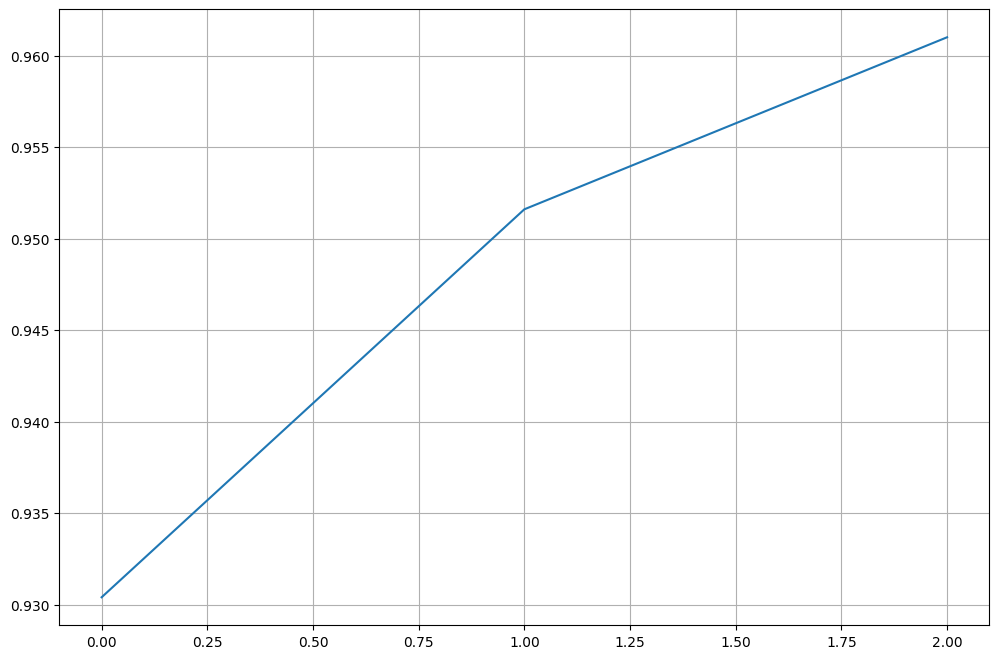

In [139]:
import matplotlib.pyplot as plt
print(accuracy)
fig, ax = plt.subplots(figsize = (12, 8))
plt.grid()
plt.plot(accuracy['valid'])
plt.show()

### Задача 4(3 балла)

Попробуйте использовать различное число слоёв nn.Linear. В сети выше их 4. Попробуйте ***3, 5, 7***. В качестве функции активации возьмите ту, что показала лучший результат в задаче 3. Постройте график зависимости точности на valid выборке от числа эпох(до 10) для разного числа слоёв. Какое число слоёв даёт лучший результат?

In [145]:
data_tfs = tfs.Compose([
    tfs.ToTensor(),
    tfs.Normalize((0.5), (0.5))
])
root = './'
train_dataset = MNIST(root, train=True,  transform=data_tfs, download=True)
val_dataset  = MNIST(root, train=False, transform=data_tfs, download=True)

train_dataloader =  DataLoader(train_dataset, batch_size=128)
valid_dataloader =  DataLoader(val_dataset, batch_size=128)

activation = nn.ELU()
model = nn.Sequential(
    # nn.Flatten преобразует входные данные, двумерный тензор, 
    #в одномерный тензор путем "сплющивания" всех осей на входном тензоре, кроме первой.
    nn.Flatten(),
    # линейный слой со 784 признаками на входе и 256 на выходе
    nn.Linear(28 * 28, 256),
    # функция активации ReLU
    activation,
    # линейный слой со 256 признаками на входе и 128 на выходе
    nn.Linear(256, 128),
    # функция активации ReLU
    activation,
    # линейный слой со 128 признаками на входе и 64 на выходе
    nn.Linear(128, 64),
    # функция активации ReLU
    activation,
    # линейный слой со 64 признаками на входе и 10 на выходе
    nn.Linear(64, 32),
    activation,
    nn.Linear(32, 10)
)

# функция потерь
criterion = nn.CrossEntropyLoss()
# оптимизатор - то что обновляет веса модели(model.parameters)
optimizer = torch.optim.Adam(model.parameters())
# словарь для удобства вывода результатов
loaders = {"train": train_dataloader, "valid": valid_dataloader}

device = "cuda" if torch.cuda.is_available() else "cpu"

In [147]:
# число эпох
max_epochs = 3
# словарь для хранения точности на обучающей и на тестовой выборке(valid)
accuracy = {"train": [], "valid": []}
# итерируемся по датасету столько раз, сколько число эпох
for epoch in range(max_epochs):
    # k принимает два значения - train и valid
    for k, dataloader in loaders.items():
        epoch_correct = 0
        epoch_all = 0
        # выбираем batch из выборки, по нему и будем делать оптимизациооный шаг
        for x_batch, y_batch in dataloader:
            if k == "train":
                # переходим в "режим обучения"
                model.train()
                # обнуляем градиенты модели
                optimizer.zero_grad()
                # выходные значения модели
                outp = model(x_batch)
                # считаем функцию потерь
                loss = criterion(outp, y_batch)
                # считаем градиенты
                loss.backward()
                # делаем шаг градиентного спуска
                optimizer.step()
            else:
                # переходим в "режим тестирования"
                model.eval()
                # отключение вычисления и хранения градиентов
                with torch.no_grad():
                    outp = model(x_batch)
            # вычисляем точность 
            preds = outp.argmax(-1)
            correct = (preds == y_batch).sum()
            all = y_batch.shape[0]
            epoch_correct += correct.item()
            epoch_all += all
        # выводим точность 
        if k == "train":
            print(f"Epoch: {epoch+1}")
        print(f"Loader: {k}. Accuracy: {epoch_correct/epoch_all}")
        accuracy[k].append(epoch_correct/epoch_all)

Epoch: 1
Loader: train. Accuracy: 0.8980833333333333
Loader: valid. Accuracy: 0.9193
Epoch: 2
Loader: train. Accuracy: 0.9429833333333333
Loader: valid. Accuracy: 0.9549
Epoch: 3
Loader: train. Accuracy: 0.9600833333333333
Loader: valid. Accuracy: 0.961


{'train': [0.8980833333333333, 0.9429833333333333, 0.9600833333333333], 'valid': [0.9193, 0.9549, 0.961]}


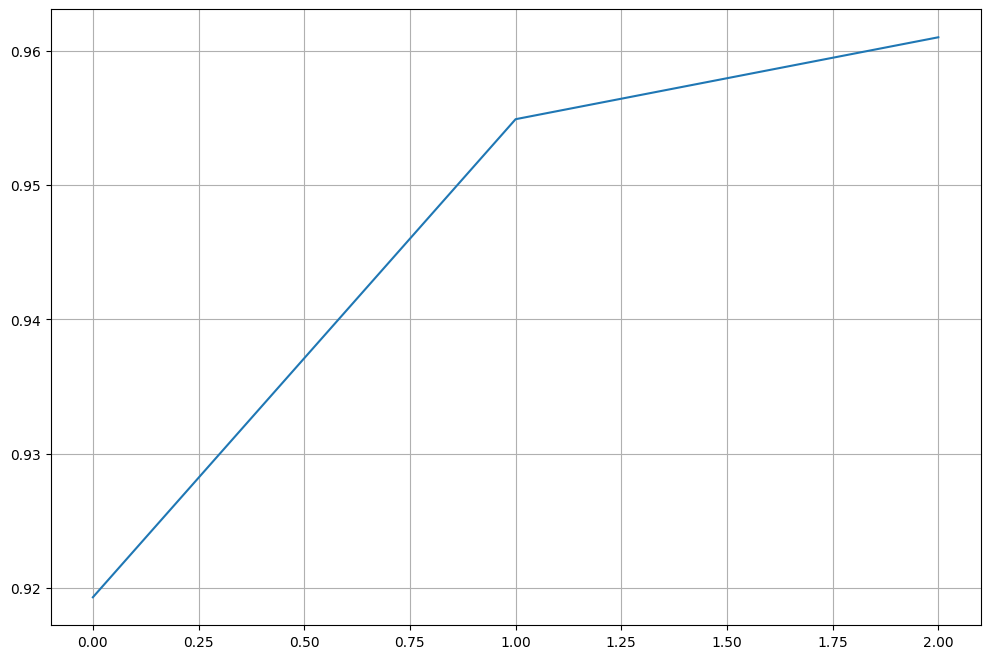

In [148]:
import matplotlib.pyplot as plt
print(accuracy)
fig, ax = plt.subplots(figsize = (12, 8))
plt.grid()
plt.plot(accuracy['valid'])
plt.show()

In [149]:
data_tfs = tfs.Compose([
    tfs.ToTensor(),
    tfs.Normalize((0.5), (0.5))
])
root = './'
train_dataset = MNIST(root, train=True,  transform=data_tfs, download=True)
val_dataset  = MNIST(root, train=False, transform=data_tfs, download=True)

train_dataloader =  DataLoader(train_dataset, batch_size=128)
valid_dataloader =  DataLoader(val_dataset, batch_size=128)

activation = nn.ELU()
model = nn.Sequential(
    # nn.Flatten преобразует входные данные, двумерный тензор, 
    #в одномерный тензор путем "сплющивания" всех осей на входном тензоре, кроме первой.
    nn.Flatten(),
    # линейный слой со 784 признаками на входе и 256 на выходе
    nn.Linear(28 * 28, 256),
    # функция активации ReLU
    activation,
    # линейный слой со 256 признаками на входе и 128 на выходе
    nn.Linear(256, 128),
    # функция активации ReLU
    activation,
    # линейный слой со 128 признаками на входе и 64 на выходе
    nn.Linear(128, 64))

# функция потерь
criterion = nn.CrossEntropyLoss()
# оптимизатор - то что обновляет веса модели(model.parameters)
optimizer = torch.optim.Adam(model.parameters())
# словарь для удобства вывода результатов
loaders = {"train": train_dataloader, "valid": valid_dataloader}

device = "cuda" if torch.cuda.is_available() else "cpu"

In [150]:
# число эпох
max_epochs = 3
# словарь для хранения точности на обучающей и на тестовой выборке(valid)
accuracy = {"train": [], "valid": []}
# итерируемся по датасету столько раз, сколько число эпох
for epoch in range(max_epochs):
    # k принимает два значения - train и valid
    for k, dataloader in loaders.items():
        epoch_correct = 0
        epoch_all = 0
        # выбираем batch из выборки, по нему и будем делать оптимизациооный шаг
        for x_batch, y_batch in dataloader:
            if k == "train":
                # переходим в "режим обучения"
                model.train()
                # обнуляем градиенты модели
                optimizer.zero_grad()
                # выходные значения модели
                outp = model(x_batch)
                # считаем функцию потерь
                loss = criterion(outp, y_batch)
                # считаем градиенты
                loss.backward()
                # делаем шаг градиентного спуска
                optimizer.step()
            else:
                # переходим в "режим тестирования"
                model.eval()
                # отключение вычисления и хранения градиентов
                with torch.no_grad():
                    outp = model(x_batch)
            # вычисляем точность 
            preds = outp.argmax(-1)
            correct = (preds == y_batch).sum()
            all = y_batch.shape[0]
            epoch_correct += correct.item()
            epoch_all += all
        # выводим точность 
        if k == "train":
            print(f"Epoch: {epoch+1}")
        print(f"Loader: {k}. Accuracy: {epoch_correct/epoch_all}")
        accuracy[k].append(epoch_correct/epoch_all)

Epoch: 1
Loader: train. Accuracy: 0.8706
Loader: valid. Accuracy: 0.9272
Epoch: 2
Loader: train. Accuracy: 0.9429833333333333
Loader: valid. Accuracy: 0.9526
Epoch: 3
Loader: train. Accuracy: 0.96115
Loader: valid. Accuracy: 0.962


{'train': [0.8706, 0.9429833333333333, 0.96115], 'valid': [0.9272, 0.9526, 0.962]}


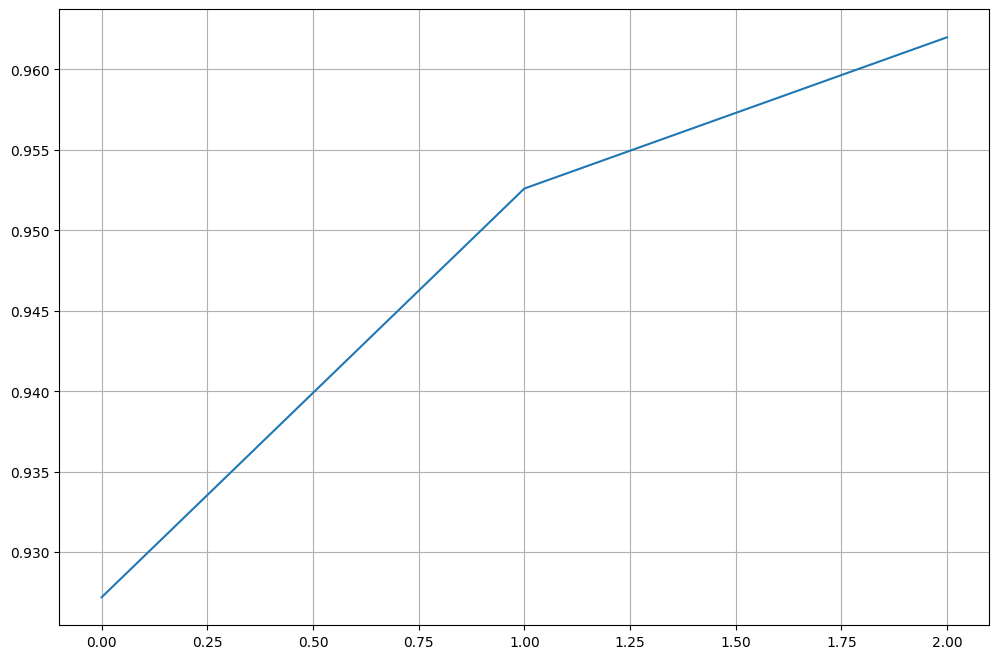

In [151]:
import matplotlib.pyplot as plt
print(accuracy)
fig, ax = plt.subplots(figsize = (12, 8))
plt.grid()
plt.plot(accuracy['valid'])
plt.show()

In [161]:
data_tfs = tfs.Compose([
    tfs.ToTensor(),
    tfs.Normalize((0.5), (0.5))
])
root = './'
train_dataset = MNIST(root, train=True,  transform=data_tfs, download=True)
val_dataset  = MNIST(root, train=False, transform=data_tfs, download=True)

train_dataloader =  DataLoader(train_dataset, batch_size=128)
valid_dataloader =  DataLoader(val_dataset, batch_size=128)

activation = nn.ELU()
model = nn.Sequential(
    # nn.Flatten преобразует входные данные, двумерный тензор, 
    #в одномерный тензор путем "сплющивания" всех осей на входном тензоре, кроме первой.
    nn.Flatten(),
    # линейный слой со 784 признаками на входе и 256 на выходе
    nn.Linear(28 * 28, 256),
    # функция активации ReLU
    activation,
    # линейный слой со 256 признаками на входе и 128 на выходе
    nn.Linear(256, 128),
    # функция активации ReLU
    activation,
    # линейный слой со 128 признаками на входе и 64 на выходе
    nn.Linear(128, 64),
    activation,
    nn.Linear(64, 32),
    activation,
    nn.Linear(32, 32),
    activation,
    nn.Linear(32, 16),
    activation, 
    nn.Linear(16, 10)
    )

# функция потерь
criterion = nn.CrossEntropyLoss()
# оптимизатор - то что обновляет веса модели(model.parameters)
optimizer = torch.optim.Adam(model.parameters())
# словарь для удобства вывода результатов
loaders = {"train": train_dataloader, "valid": valid_dataloader}

device = "cuda" if torch.cuda.is_available() else "cpu"

In [162]:
# число эпох
max_epochs = 3
# словарь для хранения точности на обучающей и на тестовой выборке(valid)
accuracy = {"train": [], "valid": []}
# итерируемся по датасету столько раз, сколько число эпох
for epoch in range(max_epochs):
    # k принимает два значения - train и valid
    for k, dataloader in loaders.items():
        epoch_correct = 0
        epoch_all = 0
        # выбираем batch из выборки, по нему и будем делать оптимизациооный шаг
        for x_batch, y_batch in dataloader:
            if k == "train":
                # переходим в "режим обучения"
                model.train()
                # обнуляем градиенты модели
                optimizer.zero_grad()
                # выходные значения модели
                outp = model(x_batch)
                # считаем функцию потерь
                loss = criterion(outp, y_batch)
                # считаем градиенты
                loss.backward()
                # делаем шаг градиентного спуска
                optimizer.step()
            else:
                # переходим в "режим тестирования"
                model.eval()
                # отключение вычисления и хранения градиентов
                with torch.no_grad():
                    outp = model(x_batch)
            # вычисляем точность 
            preds = outp.argmax(-1)
            correct = (preds == y_batch).sum()
            all = y_batch.shape[0]
            epoch_correct += correct.item()
            epoch_all += all
        # выводим точность 
        if k == "train":
            print(f"Epoch: {epoch+1}")
        print(f"Loader: {k}. Accuracy: {epoch_correct/epoch_all}")
        accuracy[k].append(epoch_correct/epoch_all)

Epoch: 1
Loader: train. Accuracy: 0.8069333333333333
Loader: valid. Accuracy: 0.8607
Epoch: 2
Loader: train. Accuracy: 0.9337
Loader: valid. Accuracy: 0.9471
Epoch: 3
Loader: train. Accuracy: 0.95355
Loader: valid. Accuracy: 0.9607


{'train': [0.8069333333333333, 0.9337, 0.95355], 'valid': [0.8607, 0.9471, 0.9607]}


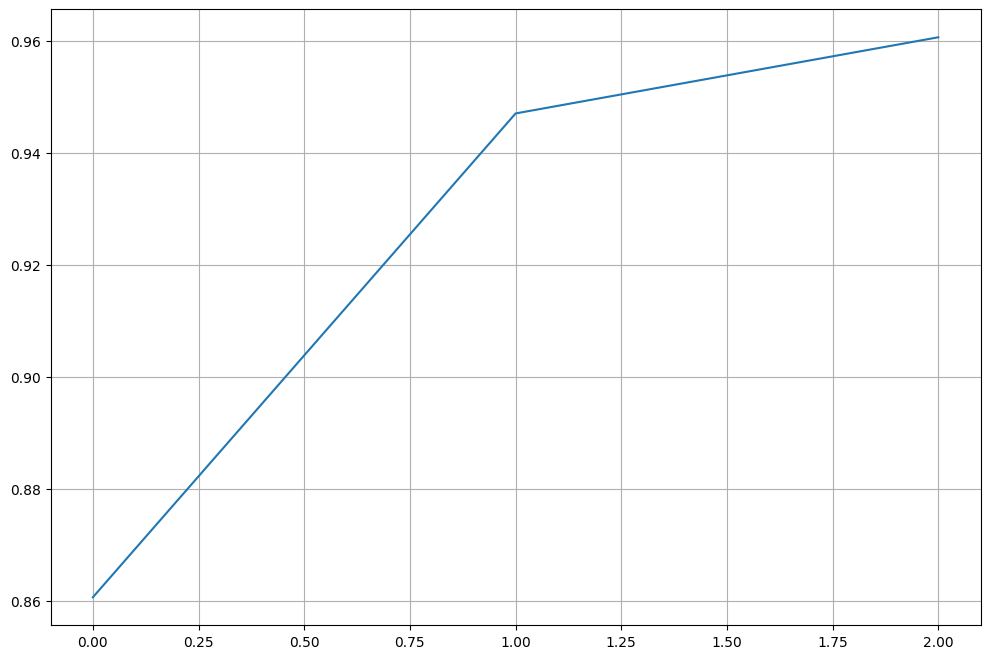

In [163]:
import matplotlib.pyplot as plt
print(accuracy)
fig, ax = plt.subplots(figsize = (12, 8))
plt.grid()
plt.plot(accuracy['valid'])
plt.show()

### Задача 5(1 балл)

Постройте график зависимости функции потерь(loss) от числа итераций для лучшей модели в задаче 4. 

In [173]:
data_tfs = tfs.Compose([
    tfs.ToTensor(),
    tfs.Normalize((0.5), (0.5))
])
root = './'
train_dataset = MNIST(root, train=True,  transform=data_tfs, download=True)
val_dataset  = MNIST(root, train=False, transform=data_tfs, download=True)

train_dataloader =  DataLoader(train_dataset, batch_size=128)
valid_dataloader =  DataLoader(val_dataset, batch_size=128)

activation = nn.ELU()
model = nn.Sequential(
    # nn.Flatten преобразует входные данные, двумерный тензор, 
    #в одномерный тензор путем "сплющивания" всех осей на входном тензоре, кроме первой.
    nn.Flatten(),
    # линейный слой со 784 признаками на входе и 256 на выходе
    nn.Linear(28 * 28, 256),
    # функция активации ReLU
    activation,
    # линейный слой со 256 признаками на входе и 128 на выходе
    nn.Linear(256, 128),
    # функция активации ReLU
    activation,
    # линейный слой со 128 признаками на входе и 64 на выходе
    nn.Linear(128, 64))

# функция потерь
criterion = nn.CrossEntropyLoss()
# оптимизатор - то что обновляет веса модели(model.parameters)
optimizer = torch.optim.Adam(model.parameters())
# словарь для удобства вывода результатов
loaders = {"train": train_dataloader, "valid": valid_dataloader}

device = "cuda" if torch.cuda.is_available() else "cpu"

In [175]:
# число эпох
max_epochs = 3
# словарь для хранения точности на обучающей и на тестовой выборке(valid)
accuracy = []
# итерируемся по датасету столько раз, сколько число эпох
for epoch in range(max_epochs):
    # k принимает два значения - train и valid
    for k, dataloader in loaders.items():
        epoch_correct = 0
        epoch_all = 0
        # выбираем batch из выборки, по нему и будем делать оптимизациооный шаг
        for x_batch, y_batch in dataloader:
            if k == "train":
                # переходим в "режим обучения"
                model.train()
                # обнуляем градиенты модели
                optimizer.zero_grad()
                # выходные значения модели
                outp = model(x_batch)
                # считаем функцию потерь
                loss = criterion(outp, y_batch)
                accuracy.append(loss.item())
                # считаем градиенты
                loss.backward()
                # делаем шаг градиентного спуска
                optimizer.step()
            else:
                # переходим в "режим тестирования"
                model.eval()
                # отключение вычисления и хранения градиентов
                with torch.no_grad():
                    outp = model(x_batch)
            # вычисляем точность 
            preds = outp.argmax(-1)
            correct = (preds == y_batch).sum()
            all = y_batch.shape[0]
            epoch_correct += correct.item()
            epoch_all += all
        # выводим точность 
        if k == "train":
            print(f"Epoch: {epoch+1}")
        #print(f"Loader: {k}. Accuracy: {epoch_correct/epoch_all}")
        #accuracy[k].append(epoch_correct/epoch_all)

Epoch: 1
Epoch: 2
Epoch: 3


[4.136816501617432, 3.500277519226074, 3.0321195125579834, 2.5848703384399414, 2.3706352710723877, 2.1658482551574707, 1.9966440200805664, 1.9382097721099854, 2.0612990856170654, 1.7873563766479492, 1.765807867050171, 1.650089979171753, 1.5607513189315796, 1.4299813508987427, 1.3736685514450073, 1.3679721355438232, 1.090011477470398, 1.1555368900299072, 1.1466937065124512, 1.1823152303695679, 1.0061440467834473, 1.0105578899383545, 0.8302780389785767, 0.9497300386428833, 0.8524379730224609, 0.8306799530982971, 0.8166248202323914, 0.8693027496337891, 0.7228012681007385, 0.8190825581550598, 0.605380117893219, 0.6964351534843445, 0.7597812414169312, 0.7266958951950073, 0.6816012263298035, 0.44121161103248596, 0.6120287179946899, 0.7145169973373413, 0.6687536239624023, 0.5797175168991089, 0.6524250507354736, 0.5883708000183105, 0.41187670826911926, 0.541901171207428, 0.4738119840621948, 0.5524086356163025, 0.44002601504325867, 0.3665940463542938, 0.4381960928440094, 0.34603753685951233, 0.

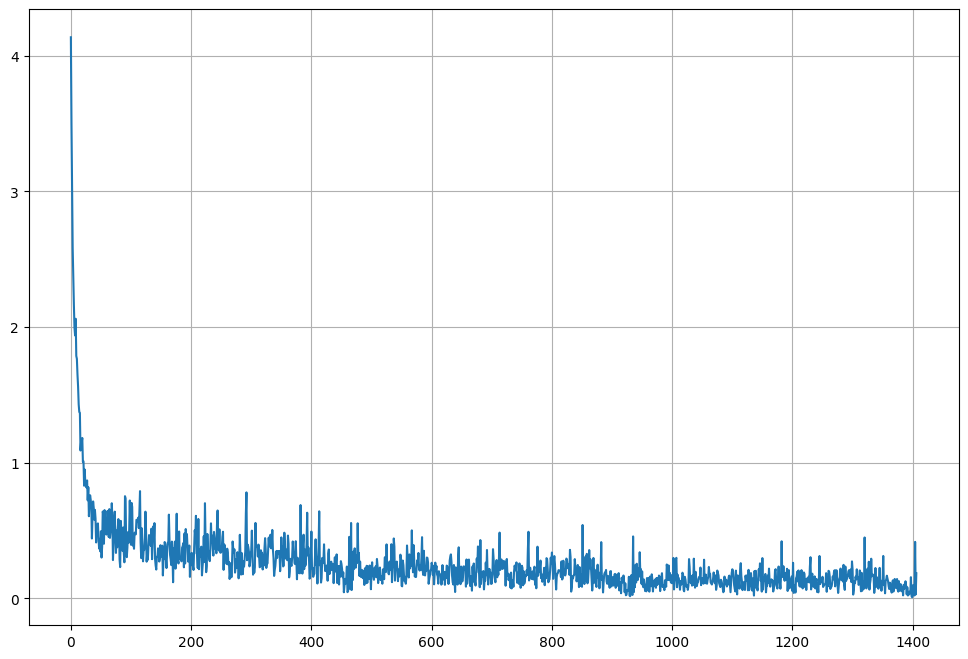

In [178]:
import matplotlib.pyplot as plt
print(accuracy)
fig, ax = plt.subplots(figsize = (12, 8))
plt.grid()
plt.plot(accuracy)
plt.show()